<a href="https://colab.research.google.com/github/vinodvicki/Advance-ml-credit-card-fraud-detection/blob/main/Advance_credit_card_fraud_dectection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advance credit card fraud dectection

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets /Machine Learning Project 25 - Advanced Credit Card fraud Detection/creditcard.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [ ]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


In [ ]:
df.duplicated().sum()

1081

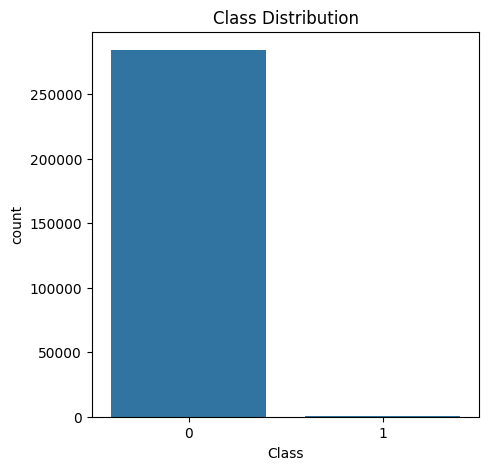

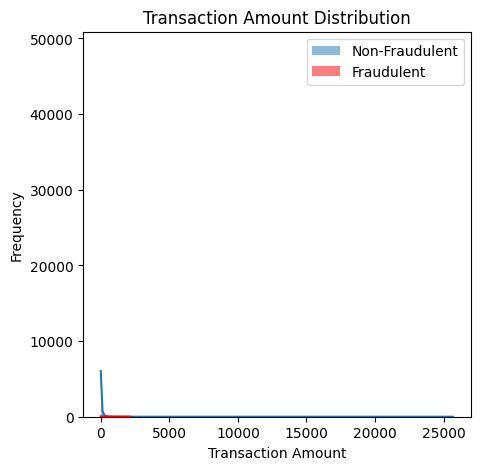

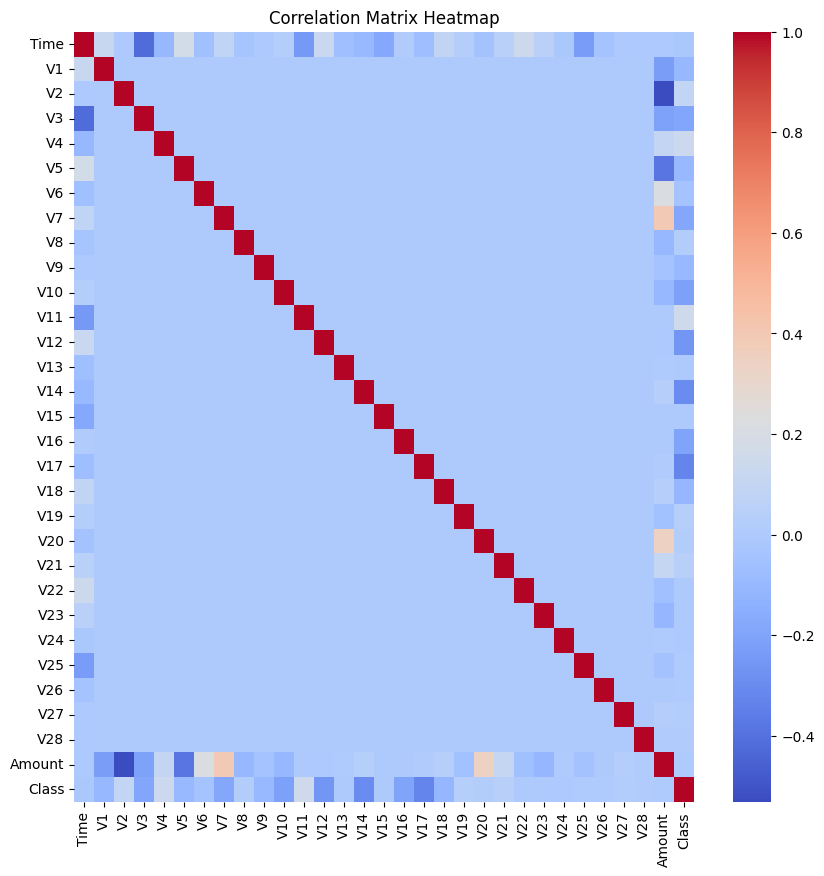

In [ ]:
# prompt: check the disturbution of data

# Check for null values
df.isnull().sum()

# Visualize the distribution of the 'Class' column (fraudulent vs. non-fraudulent transactions)
plt.figure(figsize=(5, 5))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

# Explore the distribution of other relevant features
# Example: Distribution of transaction amounts for fraudulent and non-fraudulent transactions
plt.figure(figsize=(5, 5))
sns.histplot(df[df['Class'] == 0]['Amount'], label='Non-Fraudulent', kde=True)
sns.histplot(df[df['Class'] == 1]['Amount'], label='Fraudulent', kde=True, color='red')
plt.title('Transaction Amount Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.legend()
plt.show()


# Explore the relationship between features and the target variable 'Class'
# Example: Correlation matrix heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# You can add more visualizations and explorations based on your specific needs and the features of the dataset.
# Example: Boxplots, scatter plots, etc.

In [ ]:
df.groupby('Class')['Amount'].value_counts()

Class  Amount 
0      1.00       13575
       1.98        6044
       0.89        4872
       9.99        4746
       15.00       3280
                  ...  
1      1389.56        1
       1402.16        1
       1504.93        1
       1809.68        1
       2125.87        1
Name: count, Length: 32960, dtype: int64

1. Data Preprocessing:
*  Handle class imbalance (since fraudulent transactions are likely much fewer than non-fraudulent ones).
*      Techniques include oversampling (SMOTE), undersampling, or using weighted loss functions.
*    - Consider scaling or normalizing numerical features (like 'Amount' and 'Time') to improve model performance.  StandardScaler or MinMaxScaler from sklearn.preprocessing are good options.
*    - Feature engineering:  Create new features from existing ones that might be more informative. For example, you could create features representing the time of day, day of the week, or transaction frequency for a given card.
*    - Remove unnecessary features or those with very low correlation to the target variable.

* 2. Model Selection and Training:
*    - Split data into training and testing sets using train_test_split().
*    - Choose appropriate classification models:  Logistic Regression is a good starting point, but consider other algorithms like:
*        - Random Forest
*        - Support Vector Machines (SVM)
*        - Gradient Boosting Machines (GBM, XGBoost, LightGBM, CatBoost)
*        - Neural Networks
*    - Train your chosen model on the training data.  Use appropriate evaluation metrics like accuracy, precision, recall, F1-score, and AUC-ROC, especially given the class imbalance.


* 3. Model Evaluation:
*    - Evaluate the trained model on the test data using the chosen evaluation metrics.
*    - Analyze the confusion matrix to understand the types of errors the model makes.
*    - Consider techniques like cross-validation to get a more robust estimate of the model's performance.

* 4. Hyperparameter Tuning:
*    - Use techniques like GridSearchCV or RandomizedSearchCV to find optimal hyperparameters for your chosen model.

* 5. Deployment (Optional):
*    - If you're aiming to deploy the model, consider converting it to a format suitable for your deployment environment.

In [ ]:
# disturbute data randomly
df = df.sample(frac=1)


In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
171149,120516.0,-3.086369,-3.318604,1.050667,0.998102,-1.539283,1.304697,1.501336,-0.512683,-0.421423,...,-0.598904,0.840127,2.054145,0.661043,-0.038467,-0.383002,0.794043,-0.472105,600.00,0
270635,164182.0,-0.616953,-0.224863,-0.445038,-0.935529,1.204634,-0.990753,0.535550,-0.371358,-1.327540,...,-0.244281,-0.080829,-0.063386,0.646624,-0.552039,0.514187,-0.100367,0.316180,14.00,0
207855,136857.0,1.829710,-0.724692,-0.867756,0.218121,-0.339641,0.721154,-1.149130,0.448781,1.642098,...,0.197492,0.429184,0.029492,-0.492982,-0.334114,-0.272810,0.047707,0.000998,87.29,0
2091,1611.0,1.123674,0.200348,0.399184,1.402154,-0.092696,-0.152125,0.154333,-0.068884,0.159978,...,-0.078981,0.001639,-0.091166,0.119186,0.683976,-0.317954,0.041339,0.021622,29.99,0
8476,11357.0,1.205947,-0.097997,0.778743,0.329650,-0.746506,-0.512260,-0.387660,-0.080471,1.791679,...,-0.200207,-0.118866,-0.035198,0.575839,0.362645,1.043194,-0.097206,-0.014546,6.60,0


In [ ]:
# spliting data
x = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
# Consider scaling or normalizing numerical features (like 'Amount' and 'Time')
#to improve model performance. StandardScaler or MinMaxScaler from sklearn.preprocessing are good options
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x['Amount'] = scaler.fit_transform(x['Amount'].values.reshape(-1, 1))
x['Time'] = scaler.fit_transform(x['Time'].values.reshape(-1, 1))

Standardization helps to ensure that features with different scales (like 'Amount' and 'Time', which likely have very different ranges of values) don't disproportionately influence the learning process of your machine learning model. By bringing them to a similar scale (mean of 0, standard deviation of 1), you improve the model's ability to learn patterns and make accurate predictions.

In [ ]:
#  Handle class imbalance (since fraudulent transactions are likely much fewer than non-fraudulent one
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x, y)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [ ]:
y_smote.value_counts()

,count
Class,
0,284315
1,284315
